## Análise de dados da Produção:



1.   Análise por tipo de vinho:
- Vinhos de mesa (tinto, branco e rosado)
- vinhos Finos de Mesa (tinto, branco e rosado)


2.   Impacto dos Fatores Climáticos:
- Dados de temperatura, precipitação e clima
- Fenômenos climáticos específicos

3.  Comparação com produção Nacional e Mundial
- Nacional, qual a participação na produção nacional
- Mundial, entender como o Brasil se posiciona mundialmente.



- Dados da vinícola
http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_03
- Dados da produção Nacional e Mundial
https://www.oiv.int/what-we-do/data-discovery-report?oiv

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Bibliotecas

In [73]:
#Libs

import pandas as pd
import numpy as np

#libs gráficas
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker



### Path das base de dados.

In [74]:
# DADOS DA PRODUÇÃO DA VINICOLA.
dados_producao = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS - 7DTAT/Dados_Vitivinicultura/Producao.csv", encoding = "ISO-8859-1",
            sep = ";", thousands=".", decimal=",")

# PLANILHA EXTERNA DE PRODUÇÃO MUNDIAL.
dados_producao_mundial = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS - 7DTAT/Notebooks/Produção - Evandro/Produção_Mundial.csv",
            sep = ";", thousands=".", decimal=",")

# DADOS DA PRODUÇÃO DA VINICOLA ATUALIZADA.
dados_producao_atualizado = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS - 7DTAT/Dados_Vitivinicultura/ProducaoAtualizada.csv", encoding = "ISO-8859-1",
            sep = ";", thousands=".", decimal=",")



## Produção da Vitivinicultura

### Tratando a base de dados

In [75]:
# Verificando as colunas
dados_producao.columns

Index(['id', 'control', 'produto', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')

In [76]:
# Verificando o tamanho da base de dados
dados_producao.shape

(51, 57)

In [77]:
# verificando os tipos
dados_producao.dtypes

,0
id,int64
control,object
produto,object
1970,int64
1971,int64
1972,int64
1973,int64
1974,int64
1975,int64
1976,int64


In [78]:
# Verificando se há valores nulos
dados_producao.isnull().sum().sum()

0

In [79]:
dados_producao.head(8)

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,6,vv_Tinto,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,7,vv_Branco,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,8,vv_Rosado,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [80]:
# EXCLUINDO AS COLUNAS E LINHAS
# Selecionar as colunas 'control', 'produto' e colunas a partir de 2009
colunas_selecionadas = ['control',] + [col for col in dados_producao.columns if col.isdigit() and int(col) >= 2009]
# Selecionar as linhas com os IDs específicos: 2, 3, 4, 6, 7, 8 (SOMENTE OS VINHOS)
dados_producao_vinhos = dados_producao[dados_producao['id'].isin([2, 3, 4, 6, 7, 8])][colunas_selecionadas]
# exibir
dados_producao_vinhos

,control,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
5,vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,vv_Rosado,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [81]:
# Renomenando a coluna para tipos e tornando index
dados_producao_vinhos = dados_producao_vinhos.rename(columns={'control': 'tipos'}).set_index('tipos')
dados_producao_vinhos.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
tipos,,,,,,,,,,,,,,,
vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437


In [82]:
# Transformando os dados em Float
dados_producao_vinhos = dados_producao_vinhos.astype(float)

In [83]:
# Verificar as colunas e constatar que o index contém os tipos de vinhos
dados_producao_vinhos.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

### Gráfico de produção total

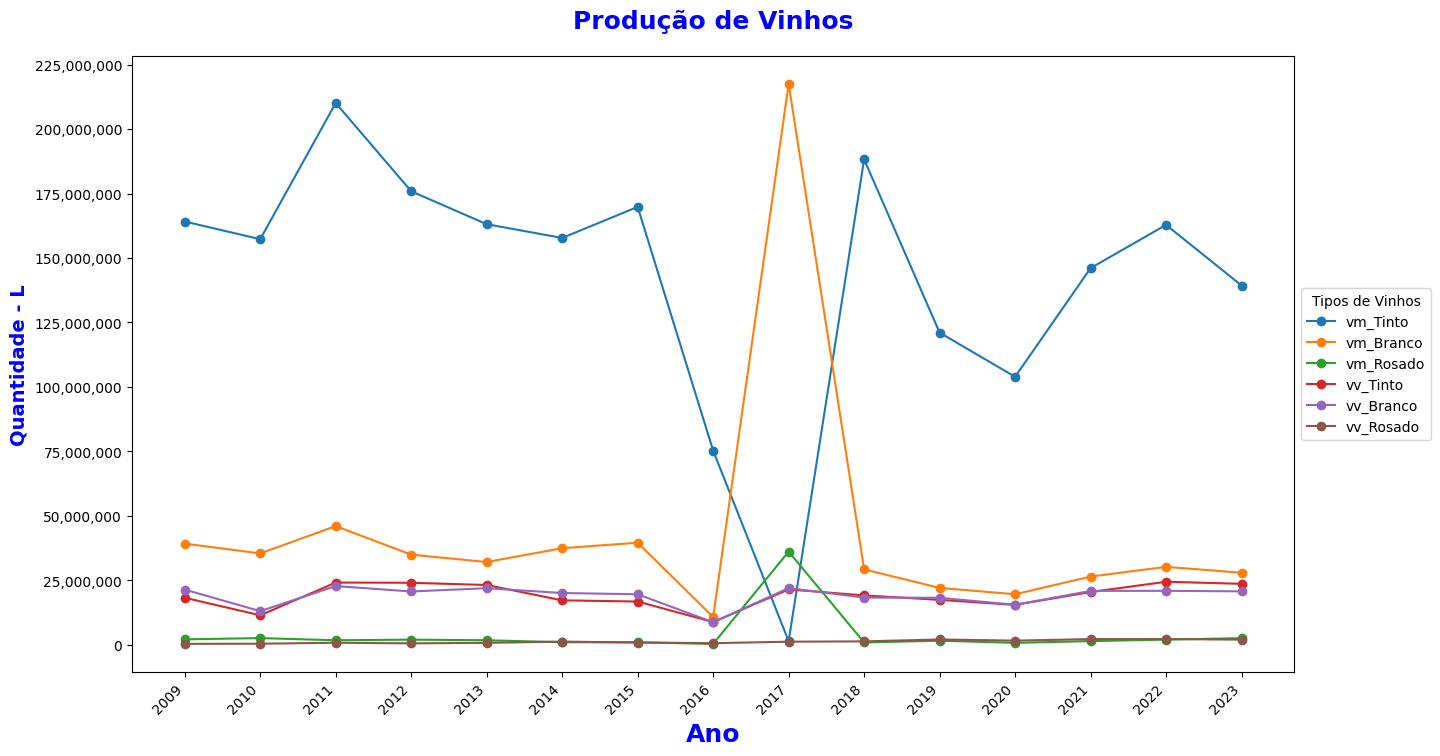

In [84]:
# Removendo as colunas dos tipos de vinhos 'vv_Rosado' e 'vm_Rosado'
dados_sem_rosados = dados_producao_vinhos.drop(columns=['vv_Rosado', 'vm_Rosado'], errors='ignore')


# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_sem_rosados.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Define os intervalos de 25.000.000 para o eixo Y
y_ticks = np.arange(0, dados_transposto.max().max() + 25_000_000, 25_000_000)
axis.set_yticks(y_ticks)

# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

# Exibindo os valores no gráfico
#for line in axis.lines:
 #   for x, y in zip(line.get_xdata(), line.get_ydata()):
  #      label = f"{y:,.2f}"      #f"{y:,.0f}" if not pd.isna(y) else ""  # Verifica se não é NaN antes de exibir
   #     axis.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Exibindo o gráfico
plt.show()

In [85]:
dados_producao_vinhos.index

Index(['vm_Tinto', 'vm_Branco', 'vm_Rosado', 'vv_Tinto', 'vv_Branco',
       'vv_Rosado'],
      dtype='object', name='tipos')

### Gráfico sem os vinhos rosados, pois estão muito próximo ao zero.

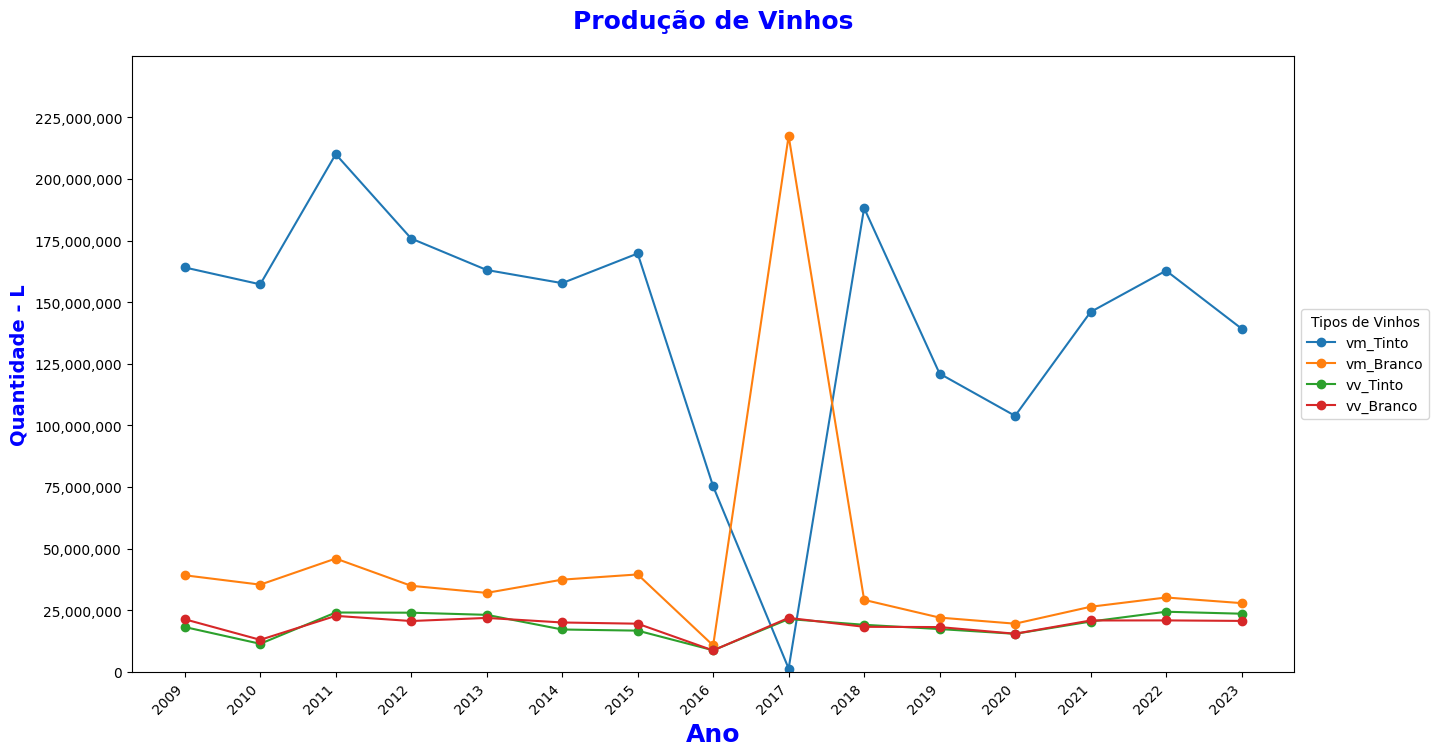

In [86]:

# Filtrando o DataFrame para remover as linhas com os vinhos 'vv_Rosado' e 'vm_Rosado' no índice
dados_sem_rosados = dados_producao_vinhos[~dados_producao_vinhos.index.isin(['vv_Rosado', 'vm_Rosado'])]

# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_sem_rosados.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Define os intervalos de 25.000.000 para o eixo Y
y_ticks = np.arange(0, dados_transposto.max().max() + 25_000_000, 25_000_000)
axis.set_yticks(y_ticks)

# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

# Limite da escala Y de 0 a 250.000.000
plt.ylim(0, 250_000_000)
# Exibindo o gráfico
plt.show()


### Tratando a base de dados atualizada
Com a divergência que pegamos na embrapa


In [87]:
# EXCLUINDO AS COLUNAS E LINHAS
# Selecionar as colunas 'control', 'produto' e colunas a partir de 2009
colunas_selecionadas = ['control',] + [col for col in dados_producao_atualizado.columns if col.isdigit() and int(col) >= 2009]
# Selecionar as linhas com os IDs específicos: 2, 3, 4, 6, 7, 8 (SOMENTE OS VINHOS)
dados_producao_vinhos_atualizado = dados_producao_atualizado[dados_producao_atualizado['id'].isin([2, 3, 4, 6, 7, 8])][colunas_selecionadas]

dados_producao_vinhos_atualizado = dados_producao_vinhos_atualizado.rename(columns={'control': 'tipos'}).set_index('tipos')
# exibir
dados_producao_vinhos_atualizado

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
tipos,,,,,,,,,,,,,,,
vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,217527985,188270142,121045115,103916391,146075996,162844214,139320884
vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,36121245,29229970,22032828,19568734,26432799,30198430,27910299
vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,1365957,875524,1551794,715289,1391200,1988968,2531246
vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
vv_Rosado,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [88]:
# Transformando os dados em Float
dados_producao_vinhos_atualizado = dados_producao_vinhos_atualizado.astype(float)

### Gráfico de produção total ATUALIZADO

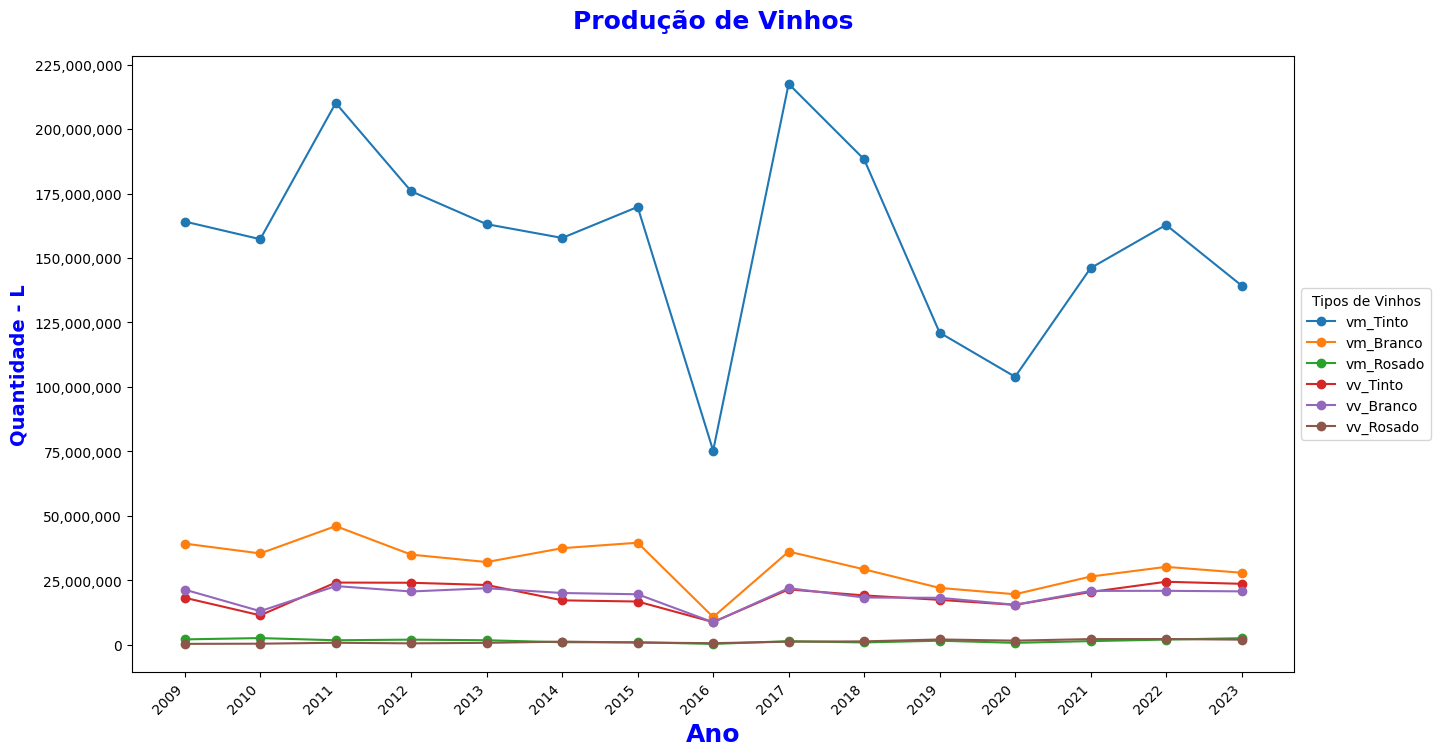

In [89]:
# Removendo as colunas dos tipos de vinhos 'vv_Rosado' e 'vm_Rosado'
dados_sem_rosados = dados_producao_vinhos_atualizado.drop(columns=['vv_Rosado', 'vm_Rosado'], errors='ignore')


# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_sem_rosados.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Define os intervalos de 25.000.000 para o eixo Y
y_ticks = np.arange(0, dados_transposto.max().max() + 25_000_000, 25_000_000)
axis.set_yticks(y_ticks)

# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

# Exibindo os valores no gráfico
#for line in axis.lines:
 #   for x, y in zip(line.get_xdata(), line.get_ydata()):
  #      label = f"{y:,.2f}"      #f"{y:,.0f}" if not pd.isna(y) else ""  # Verifica se não é NaN antes de exibir
   #     axis.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Exibindo o gráfico
plt.show()

### Gráfico sem os vinhos rosados ATUALIZADO

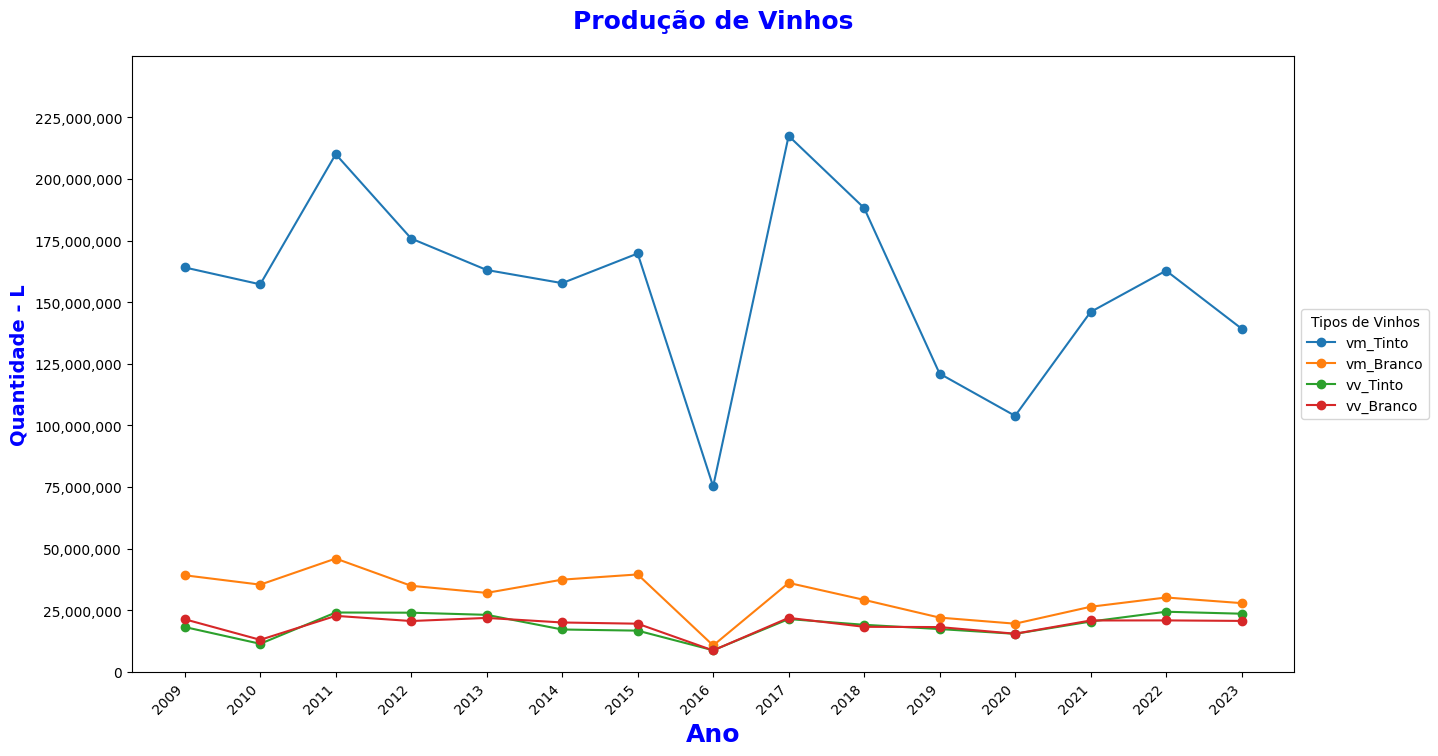

In [90]:

# Filtrando o DataFrame para remover as linhas com os vinhos 'vv_Rosado' e 'vm_Rosado' no índice
dados_sem_rosados = dados_producao_vinhos_atualizado[~dados_producao_vinhos.index.isin(['vv_Rosado', 'vm_Rosado'])]

# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_sem_rosados.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Define os intervalos de 25.000.000 para o eixo Y
y_ticks = np.arange(0, dados_transposto.max().max() + 25_000_000, 25_000_000)
axis.set_yticks(y_ticks)

# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

# Limite da escala Y de 0 a 250.000.000
plt.ylim(0, 250_000_000)
# Exibindo o gráfico
plt.show()

## Produção Mundial x Nacional x Vinícola

### Tratando a base de dados.

Produção mundial

In [91]:
# Verificando o data frame
dados_producao_mundial
dados_producao_mundial.head()

,Rótulos de Linha,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Geral
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
1,Albania,17500000,18100000,18000000,19000000,18000000,17500000,16400000,17800000,16900000,15300000,18700000,19200000,29500000,22800000,NaN,264700000
2,Algeria,58800000,47500000,48000000,49200000,49800000,12600000,9600000,6600000,22700000,19300000,19300000,19400000,18300000,18000000,NaN,399100000
3,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
4,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0


In [92]:
# Verificando as colunas
dados_producao_mundial.columns

Index(['Rótulos de Linha', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Total Geral'],
      dtype='object')

In [93]:
# Excluindo renomeando a coluna País e transformando em Index
dados_producao_mundial = dados_producao_mundial.rename(columns={"Rótulos de Linha": "País"}).set_index("País")


In [94]:
# Verificando as colunas
dados_producao_mundial.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', 'Total Geral'],
      dtype='object')

In [95]:
# Verificando as informações
dados_producao_mundial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2009         217 non-null    float64
 1   2010         219 non-null    int64  
 2   2011         219 non-null    int64  
 3   2012         219 non-null    int64  
 4   2013         219 non-null    int64  
 5   2014         219 non-null    int64  
 6   2015         219 non-null    int64  
 7   2016         219 non-null    int64  
 8   2017         219 non-null    int64  
 9   2018         219 non-null    int64  
 10  2019         219 non-null    int64  
 11  2020         219 non-null    int64  
 12  2021         219 non-null    int64  
 13  2022         219 non-null    int64  
 14  2023         37 non-null     float64
 15  Total Geral  219 non-null    float64
dtypes: float64(3), int64(13)
memory usage: 29.1+ KB


In [96]:
#dados_producao_mundial
#dados_producao_mundial.loc["Italy"]

In [97]:
# Verificando o Index
dados_producao_mundial.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Virgin Islands', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='País', length=219)

Produção Vinicola

In [98]:
# Verificando os dados da nossa vinícola
dados_producao_vinhos

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
tipos,,,,,,,,,,,,,,,
vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
vv_Rosado,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [99]:
# Somando o total produzido por ano em nossa vinícola e criando outra database
total_vinicola = dados_producao_vinhos.sum(axis=0)
pd.options.display.float_format = '{:.0f}'.format
total_vinicola

,0
2009,245318774
2010,220073693
2011,305439220
2012,257977767
2013,242686752
2014,234637437
2015,247457542
2016,104389641
2017,299553057
2018,257082856


### Gráfico de produção por País

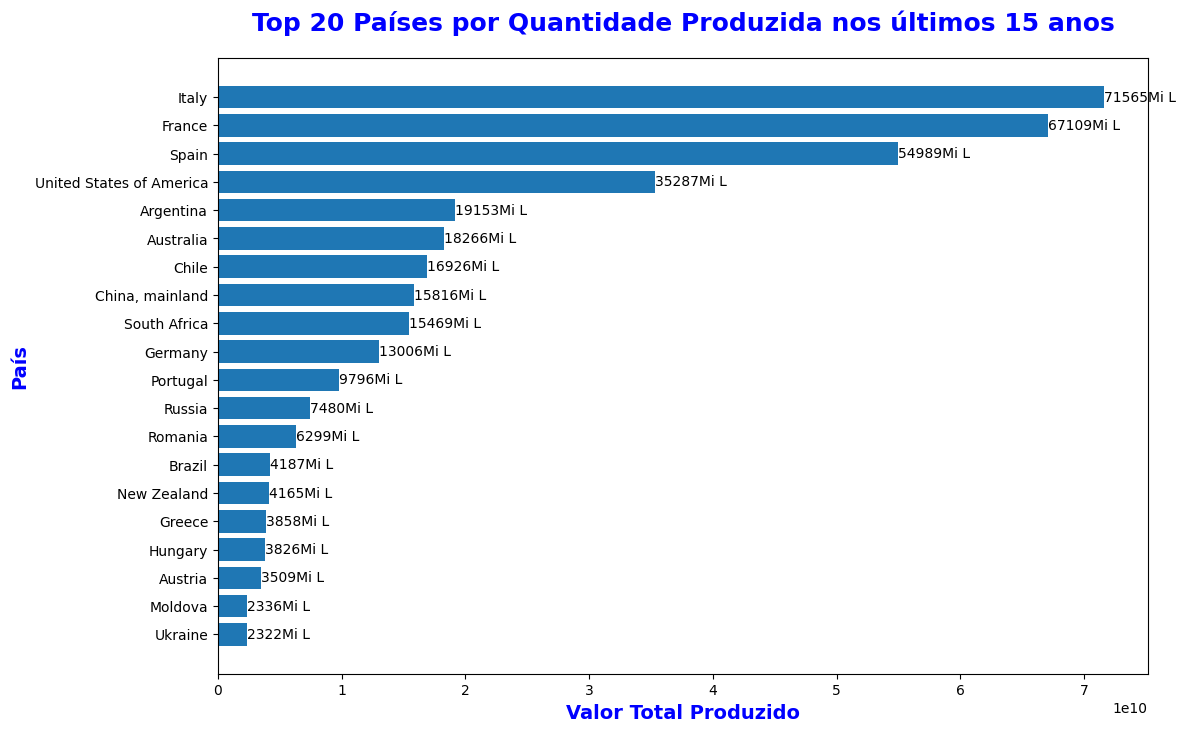

In [100]:
# Gráfico de barras horizontal para mostrar o valor produzido por País
# Agrupar os dados por país e somar os valores
valor_por_pais  = dados_producao_mundial.groupby("País")["Total Geral"].sum().sort_values(ascending=False)

# Excluir a linha global
valor_por_pais.drop("Global", inplace=True)

# Selecionar apenas os 20 países que mais exportam
top_20_paises = valor_por_pais.head(20)
plt.figure(figsize=(12, 8))


# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values)

# Adicionar título e rótulos
plt.title("Top 20 Países por Quantidade Produzida nos últimos 15 anos",fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Valor Total Produzido",fontsize=14, fontweight="bold", color="blue")
plt.ylabel("País", fontsize=14, fontweight="bold", color="blue")

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.0f}Mi L', va="center", ha="left", color="Black")

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

### Gráfico de produção Mundial x Nacional x vinícola

<ipython-input-101-97b7564ec706>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(combinado_log.index[i], combinado_log[coluna][i], valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
<ipython-input-101-97b7564ec706>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(combinado_log.index[i], combinado_log[coluna][i] + 0.05, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
<ipython-input-101-97b7564ec706>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

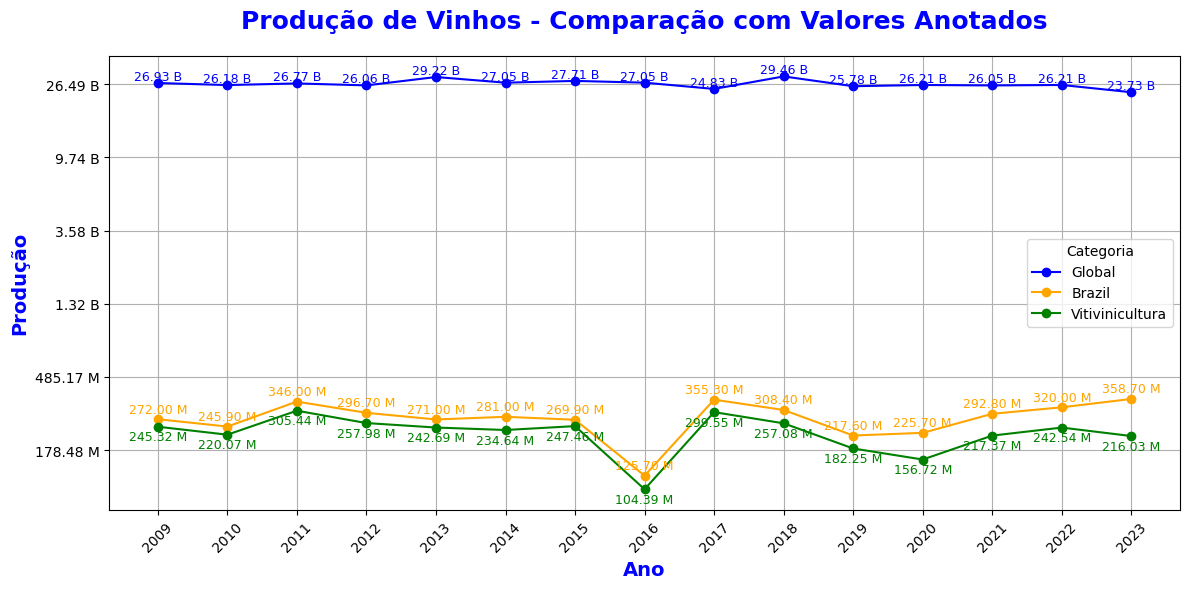

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Selecionar dados de "Global" e "Brazil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Vitivinicultura']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Aplicar transformação logarítmica (adiciona 1 para evitar log(0))
combinado_log = np.log(combinado + 1)
# Função para formatar os valores originais no eixo Y
def formatar_valor_eixo_y(valor, pos):
    valor_original = np.exp(valor) - 1  # Reverte a transformação logarítmica
    if valor_original >= 1e9:
        return f'{valor_original/1e9:.2f} B'
    elif valor_original >= 1e6:
        return f'{valor_original/1e6:.2f} M'
    else:
        return f'{valor_original:.0f}'

# Aplicar a formatação ao eixo Y do gráfico logarítmico
plt.figure(figsize=(12, 6))
cores = {'Global': 'blue', 'Brazil': 'orange', 'Vitivinicultura': 'green'}
for coluna in combinado_log.columns:
    plt.plot(combinado_log.index, combinado_log[coluna], marker='o', label=coluna, color=cores[coluna])

    # Adicionar os valores nas linhas com formatação adequada
    for i, valor in enumerate(combinado[coluna]):
        valor_formatado = formatar_valor(valor)
        if coluna == 'Brazil':
            plt.text(combinado_log.index[i], combinado_log[coluna][i] + 0.05, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
        elif coluna == 'Vitivinicultura':
            plt.text(combinado_log.index[i], combinado_log[coluna][i] - 0.05, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='top')
        else:
            plt.text(combinado_log.index[i], combinado_log[coluna][i], valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')

# Personalizar o gráfico
plt.title('Produção de Vinhos - Comparação com Valores Anotados',fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel('Ano', fontsize=14, fontweight="bold", color="blue")
plt.ylabel('Produção', fontsize=14, fontweight="bold", color="blue")

# Customizar a escala do eixo Y para usar a função de formatação
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valor_eixo_y))
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()
